# Clustering K-means

## Clustering sur les joueurs de NBA

In [56]:
import pandas as pd

nba = pd.read_csv('nba_2013.csv')
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


## Meneurs de jeu


+ Créer un nouveau DataFrame qui contient uniquement les meneurs de jeu du dataset.
 - Les meneurs de jeu sont spécifiés par PG pour Points guards dans la colonne 'pos'.
 - Assigner le DataFrame filtré à la variable point_guards.
 - Afficher le résultat.

In [57]:
point_guards = nba[nba['pos'] == 'PG']
point_guards

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,146,159,307,54,8,102,85,378,2013-2014,2013
52,Eric Bledsoe,PG,24,PHO,43,40,1416,265,556,0.477,...,175,202,235,69,14,143,99,763,2013-2014,2013
60,Avery Bradley,PG,23,BOS,60,58,1855,361,825,0.438,...,178,226,85,63,11,96,145,891,2013-2014,2013
64,Aaron Brooks,PG,29,TOT,72,12,1557,233,581,0.401,...,97,140,233,52,13,117,146,645,2013-2014,2013
71,Trey Burke,PG,21,UTA,70,68,2262,341,897,0.380,...,171,208,396,42,6,131,145,895,2013-2014,2013
76,Dwight Buycks,PG,24,TOR,14,0,146,15,48,0.313,...,19,23,10,8,0,10,11,43,2013-2014,2013


## Points par match

In [58]:
pd.options.mode.chained_assignment = None

point_guards['ppg'] = point_guards['pts']/point_guards['g']

In [5]:
# vérifier que ppg = pts/g
point_guards[['pts','g','ppg']].head(5)

,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


## Ratio passe décisive - perte de balle

+ Supprimer les joueurs qui ont 0 turnover.
 - Non seulement ces joueurs ont joué que quelques matchs, ce qui rend difficile la compréhension de leurs véritables capacités mais surtout nous ne pouvons pas diviser par 0 lors du calcul de atr.
+ Utiliser la même technique de division que celle utilisée avec les Points Per Game pour créer la colonne Assist Turnover Ratio (atr) pour le DataFrame point_guards.


In [59]:
point_guards = point_guards[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast']/point_guards['tov']

## Visualiser graphiquement ces meneurs de jeu

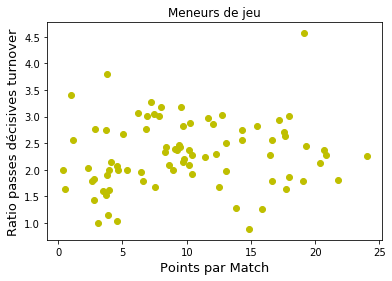

In [8]:
import matplotlib.pyplot as plt

plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Meneurs de jeu")
plt.xlabel('Points par Match', fontsize=13)
plt.ylabel('Ratio passes décisives turnover', fontsize=13)
plt.show()

## L'algorithme Setup K-Means

#### Pour commencer, sélection au hasard de 5 joueurs qui seront utilisés comme centroïdes initiaux

#### Etape 1 : Assigner les points du dataset aux clusters

#### Etape 2 : Mise à jour des nouveaux centroïdes des clusters

In [39]:
import numpy as np
num_clusters = 5

# Utiliser la fonction random de Numpy pour générer une liste d'indices, taille: num_clusters
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)

# Utiliser les indices aléatoires pour créer les centroïdes
centroids = point_guards.loc[random_initial_points]

## Visualiser les centroïdes

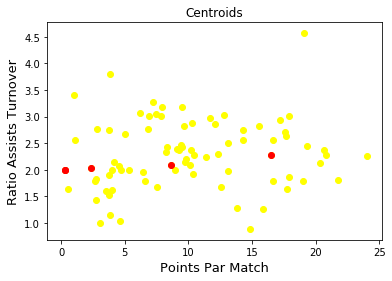

In [23]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Par Match', fontsize=13)
plt.ylabel('Ratio Assists Turnover', fontsize=13)
plt.show()

## Algorithme Setup K-Means (la suite)


#### Dictionnaire de centroïdes :

+ Clé: cluster_id
+ Valeur: liste de coordonnées du centroïde correspondant

In [40]:
def centroids_to_dict(centroids):
    dictionary = dict()
    
    # compteur itératif utilisé pour générer un cluster_id
    counter = 0
    
    # Itérer le dataframe en utilisant .iterrows() ligne par ligne
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1
        
    return dictionary

centroids_dict = centroids_to_dict(centroids)
centroids_dict

{0: [16.676470588235293, 2.5695364238410594],
 1: [2.75, 1.8205128205128205],
 2: [17.65753424657534, 2.6449704142011834],
 3: [9.123287671232877, 2.3833333333333333],
 4: [7.875, 3.016949152542373]}

## Etape 1 (Distance euclidienne)


<img src="pyth.png" alt="drawing" style="width:400px;"/>

Soit q = [5,2] et p = [3,1]

<img src="pyth2.png" alt="drawing" style="width:400px;"/>

In [26]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference ** 2
        root_distance += squared_difference
        
    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

# test pour q et p
q = [5, 2]
p = [3, 1]

# sqrt(5) = 2.24
print(calculate_distance(q,p))
        

2.23606797749979


## Etape 1 (la suite)


+ Créer une fonction assign_to_cluster pouvant être appliquée à chaque ligne du dataset (en utilisant la fonction apply de pandas).
 - Pour chaque joueur, nous voulons calculer les distances jusqu'au centroïde de chaque cluster en utilisant la fonction calculate_distance.
 - Une fois que nous connaissons les distances, nous pouvons déterminer quel centroïde est le plus proche (celui qui a la distance la plus faible) et retourner le cluster_id de ce centroïde. 
+ Créer une nouvelle colonne qu'on nomme cluster, qui contient le résultat de assign_to_cluster.


In [41]:
# Fonction assign_to_cluster ajoute la valeur du cluster correspondant ligne par ligne
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster
    

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

In [34]:
point_guards

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,blk,tov,pf,pts,season,season_end,ppm,ppg,atr,cluster
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,3,125,147,930,2013-2014,2013,13.098592,13.098592,2.504000,3
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,4,19,30,150,2013-2014,2013,7.500000,7.500000,1.684211,2
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,0,125,129,660,2013-2014,2013,8.354430,8.354430,2.424000,2
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,9,82,161,666,2013-2014,2013,9.250000,9.250000,2.365854,2
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,8,102,85,378,2013-2014,2013,6.872727,6.872727,3.009804,2
52,Eric Bledsoe,PG,24,PHO,43,40,1416,265,556,0.477,...,14,143,99,763,2013-2014,2013,17.744186,17.744186,1.643357,3
60,Avery Bradley,PG,23,BOS,60,58,1855,361,825,0.438,...,11,96,145,891,2013-2014,2013,14.850000,14.850000,0.885417,3
64,Aaron Brooks,PG,29,TOT,72,12,1557,233,581,0.401,...,13,117,146,645,2013-2014,2013,8.958333,8.958333,1.991453,2
71,Trey Burke,PG,21,UTA,70,68,2262,341,897,0.380,...,6,131,145,895,2013-2014,2013,12.785714,12.785714,3.022901,3
76,Dwight Buycks,PG,24,TOR,14,0,146,15,48,0.313,...,0,10,11,43,2013-2014,2013,3.071429,3.071429,1.000000,0


## Visualiser les Clusters


In [43]:
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Par Match', fontsize=13)
        plt.ylabel('Ratio Assists Turnover', fontsize=13)
    
    plt.show()

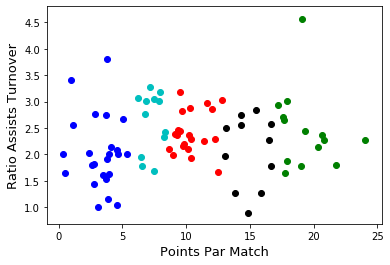

In [44]:
visualize_clusters(point_guards, 5)

## Etape 2

+ Compléter la fonction recalculate_centroids, qui doit:
 - Prendre le DataFrame point_guards en paramètre,
 - Utiliser chaque cluster_id (de 0 à num_clusters - 1) pour extraire tous les joueurs de chaque cluster,
 - Calculer la nouvelle moyenne arithmétique,
 - Ajouter cluster_id et les coordonnées correspondantes au dictionnaire new_centroids_dict, le dictionnaire final qui doit être retourné.


In [49]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    # 0..1...2...3...4
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        
        # Calculer le nouveau centroïde en utilisant la moyenne arithmétique des valeurs
        # du cluster
        new_centroid = [np.average(values_in_cluster['ppg']), 
                        np.average(values_in_cluster['atr'])]
        
        new_centroids_dict[cluster_id] = new_centroid   
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

centroids_dict

{0: [14.977111294058943, 2.0598841655866753],
 1: [3.2510322129176843, 2.032060176491893],
 2: [19.366254670549946, 2.4630502116571713],
 3: [10.372457734018354, 2.416272997711302],
 4: [7.291968869482381, 2.6300956977105105]}

In [50]:
# .average()

## Répéter l'étape 1

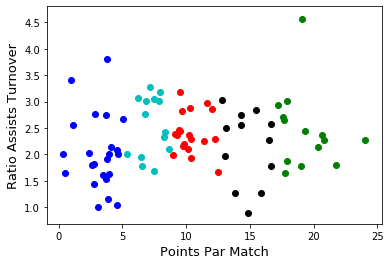

In [52]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

## Répéter les étapes 1 et 2

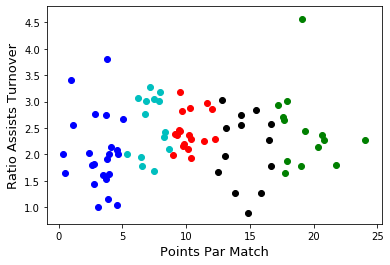

In [54]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

## Utilisation de la classe K-Means

In [60]:
nba = pd.read_csv('nba_2013.csv')
point_guards = nba[nba['pos'] == 'PG']
point_guards['ppg'] = point_guards['pts']/point_guards['g']
point_guards = point_guards[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast']/point_guards['tov']

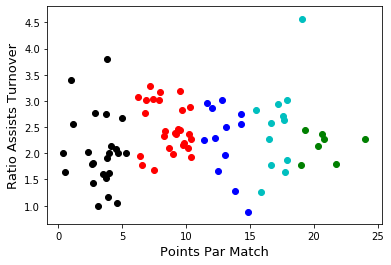

In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg','atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)